In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
%matplotlib inline




In [3]:
exams = pd.read_csv("exams.csv")
os_keys = pd.read_csv("os_topic_keys.csv")

In [5]:
os_keys

,character,category
0,p,Process Management
1,m,Memory Mangagement
2,f,File Systems
3,d,Device Management
4,s,Synchronization and Concurrency


In [4]:
exams

,exam,total_points
0,08-fall-mid,100
1,09-fall-mid,120
2,09-spring-mid,100
3,10-spring-final,100
4,11-fall-final,100
5,11-fall-mid,110
6,11-spring-mid,80
7,12-spring-mid,150
8,13-fall-mid,160
9,18-spring-final,79


In [16]:
columns = os_keys['category'].tolist()
columns.append('overall')
gpt35_df = pd.DataFrame(columns = columns)

In [30]:
gpt35_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
    print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt3.5_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
    
    gpt35_df.loc[len(gpt35_df.index)] = l
#         print(tmp)
l = []
for col in gpt35_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(gpt35_df[col][i]):
            curr_topic += gpt35_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt35_df.loc[len(gpt35_df.index)] = l

08-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0            cm      [m]                 10              6.5
1             m      [p]                  6              4.0
2            md      [m]                 13             12.0
3            ds      [f]                  8              6.0
09-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0             s      [p]                 17               14
1           smd      [m]                  4                7
2           smd      [p]                  8               12
3            ds      [m]                 15                7
4            cs      [m]                 15               12
5             m   [m, d]                 16               12
09-spring-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0            ms      [p]                6.0                6
1            ms      [m]               11.0                6
2             m      [m]               14.5    

In [31]:
gpt35_df

,Process Management,Memory Mangagement,File Systems,Device Management,Synchronization and Concurrency,overall
0,0.240000,0.460000,0.320000,NaN,NaN,0.370000
1,0.625000,0.625000,NaN,0.800000,NaN,0.625000
2,0.300000,0.600000,NaN,0.750000,NaN,0.540000
3,NaN,0.733333,0.720000,NaN,0.816667,0.725000
4,0.400000,0.325000,0.200000,0.400000,0.250000,0.250000
5,0.740000,0.372727,NaN,0.866667,0.566667,0.550000
6,0.393750,0.350000,NaN,0.612500,NaN,0.362500
7,0.962500,0.685714,NaN,0.650000,0.750000,0.763333
8,0.550000,0.433333,NaN,NaN,0.570000,0.490625
9,NaN,0.487179,0.514286,NaN,NaN,0.518987


In [32]:
bard_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
    print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['bard_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['bard_pts_earned'].sum()/exams.iat[i,1])
    
    bard_df.loc[len(bard_df.index)] = l
#         print(tmp)
l = []
for col in bard_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(bard_df[col][i]):
            curr_topic += bard_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
bard_df.loc[len(bard_df.index)] = l
    

08-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0            cm      [m]                 10              6.5
1             m      [p]                  6              4.0
2            md      [m]                 13             12.0
3            ds      [f]                  8              6.0
09-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0             s      [p]                 17               14
1           smd      [m]                  4                7
2           smd      [p]                  8               12
3            ds      [m]                 15                7
4            cs      [m]                 15               12
5             m   [m, d]                 16               12
09-spring-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0            ms      [p]                6.0                6
1            ms      [m]               11.0                6
2             m      [m]               14.5    

   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned
0              q      [p]                  1                0
1              q      [p]                  1                1
2             qm      [p]                  1                1
3              q      [m]                  1                0
4              q      [m]                  0                0
5             qm      [m]                  1                1
6              q      [m]                  0                1
7              q      [m]                  0                0
8              q      [p]                  1                1
9             qm      [p]                  0                1
10            qm      [p]                  1                0
11             q      [p]                  1                1
12            qm      [m]                  1                0
13           qdm      [m]                  0                0
14            qm      [m]                  0                1
15      

In [33]:
bard_df

,Process Management,Memory Mangagement,File Systems,Device Management,Synchronization and Concurrency,overall
0,0.160000,0.370000,0.240000,NaN,NaN,0.285000
1,0.650000,0.475000,NaN,0.600000,NaN,0.533333
2,0.300000,0.300000,NaN,0.200000,NaN,0.300000
3,NaN,0.633333,0.680000,NaN,0.633333,0.620000
4,0.200000,0.500000,0.300000,0.800000,0.300000,0.330000
5,0.520000,0.583273,NaN,0.766667,0.866667,0.632545
6,0.284375,0.332500,NaN,0.612500,NaN,0.318750
7,0.625000,0.621429,NaN,1.000000,0.550000,0.663333
8,0.650000,0.405556,NaN,NaN,0.660000,0.515625
9,NaN,0.410256,0.442857,NaN,NaN,0.455696


In [39]:
bard_df.to_csv('bard_os_topic.csv', index = False)
gpt35_df.to_csv('gpt35_os_topic.csv', index = False)

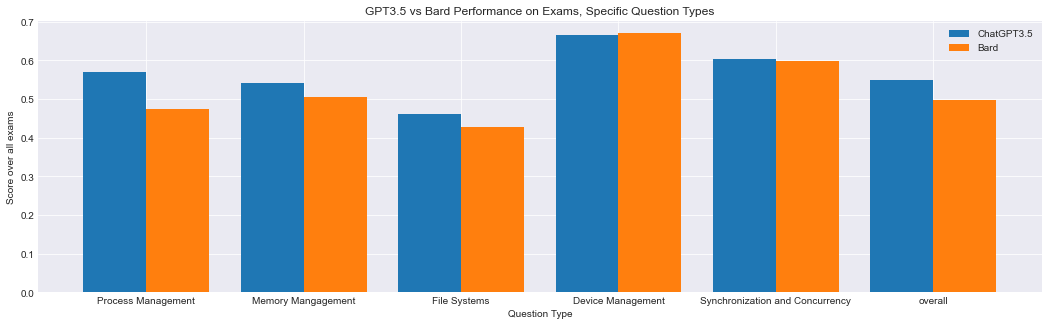

In [37]:
xax = np.arange(len(bard_df.loc[13].tolist()))
gpt = gpt35_df.loc[13]
b = bard_df.loc[13]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax - 0.2, gpt, 0.4, label = 'ChatGPT3.5')
plt.bar(xax + 0.2, b, 0.4, label = 'Bard')

plt.xticks(xax, bard_df.columns)
plt.xlabel("Question Type")
plt.ylabel("Score over all exams")
plt.title("GPT3.5 vs Bard Performance on Exams, Specific Question Types")
plt.savefig('ostopic_overall.png')
plt.legend()
plt.show()

In [ ]:
fig.savefig('ostopic_overall.png')

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


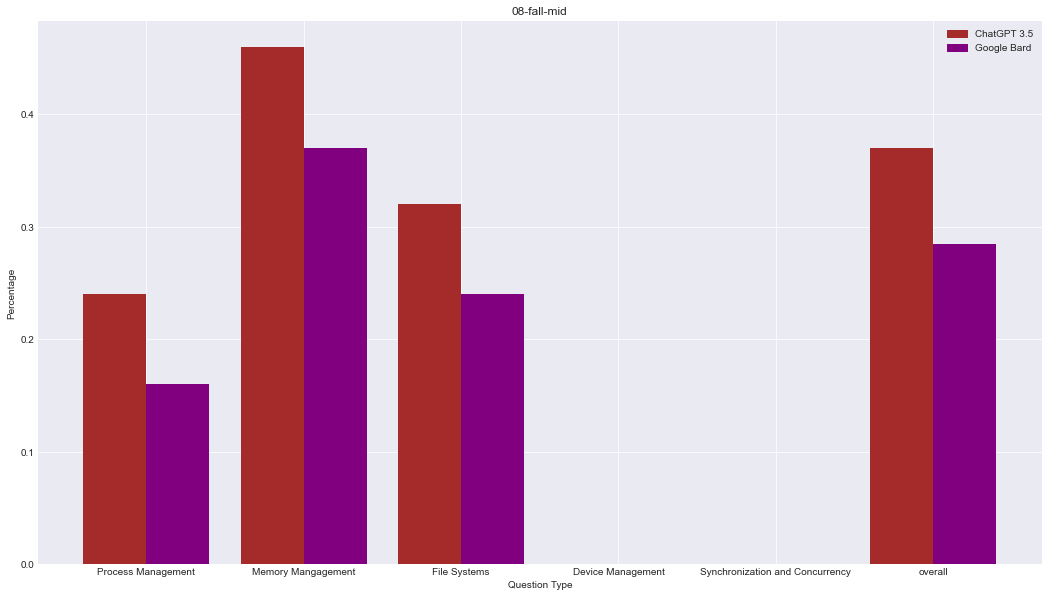

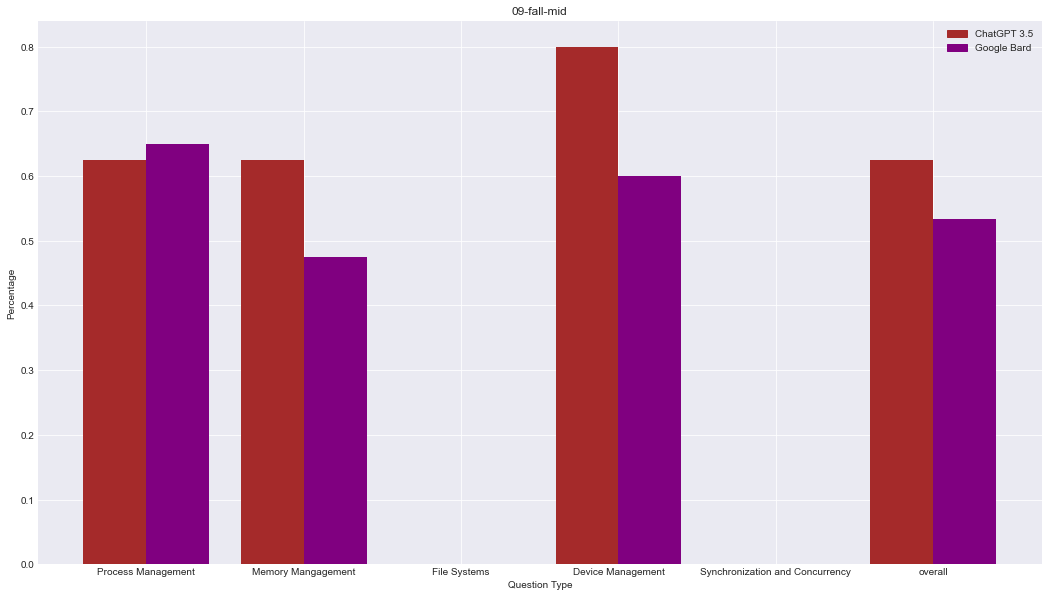

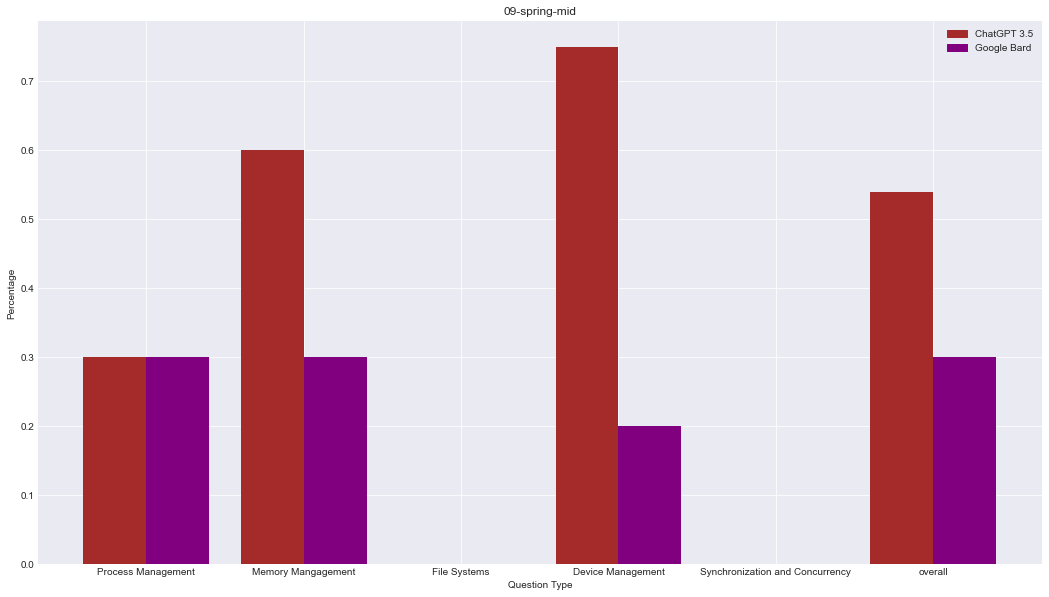

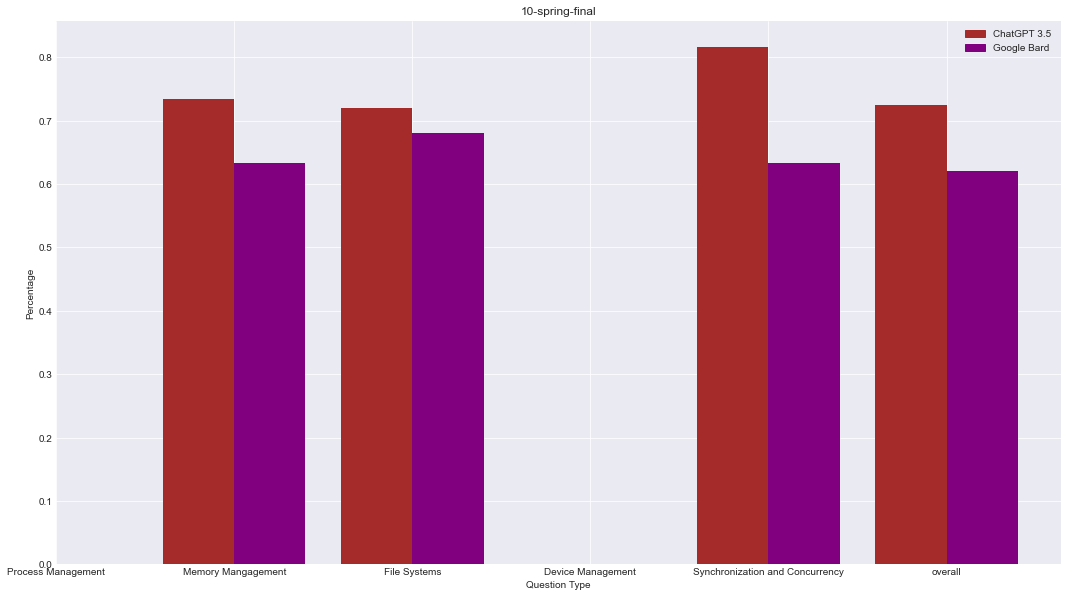

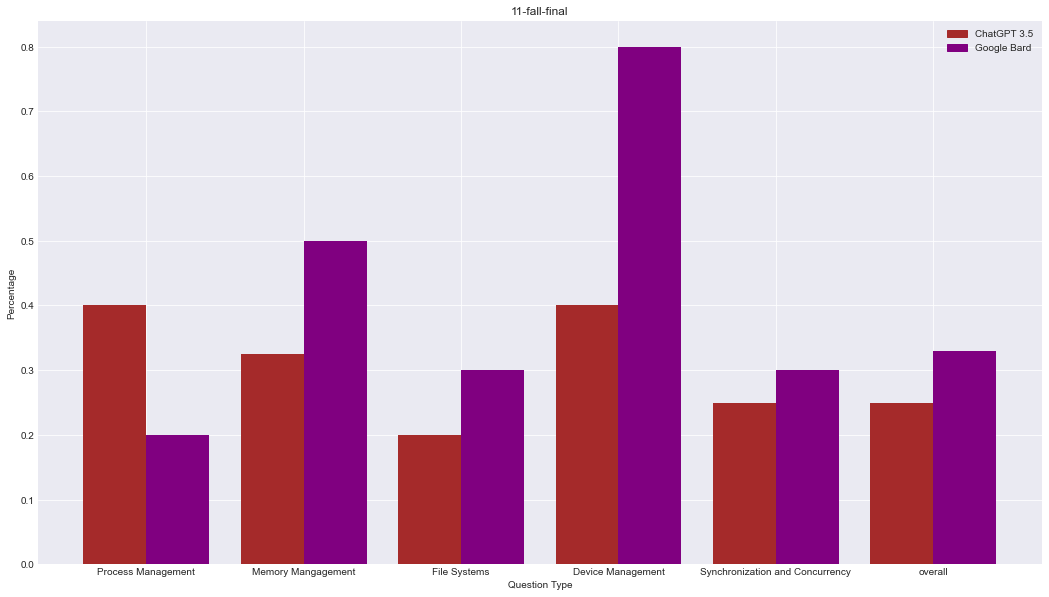

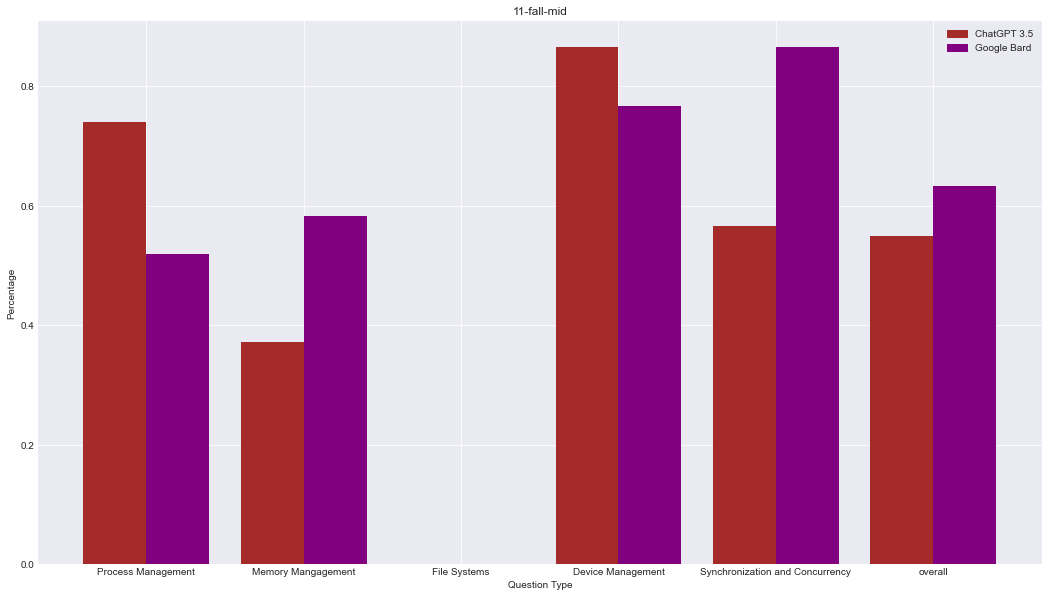

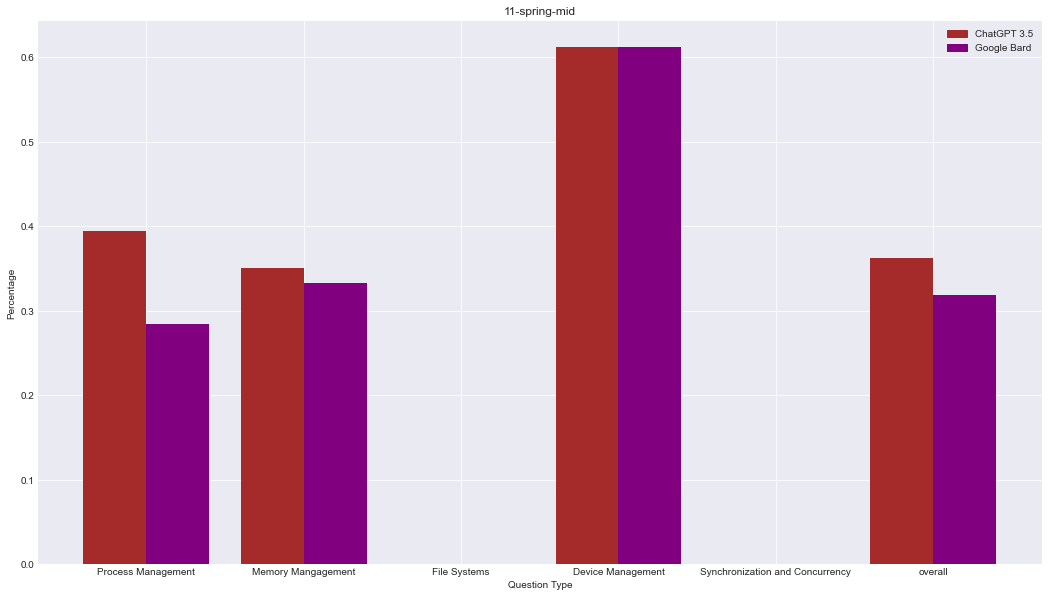

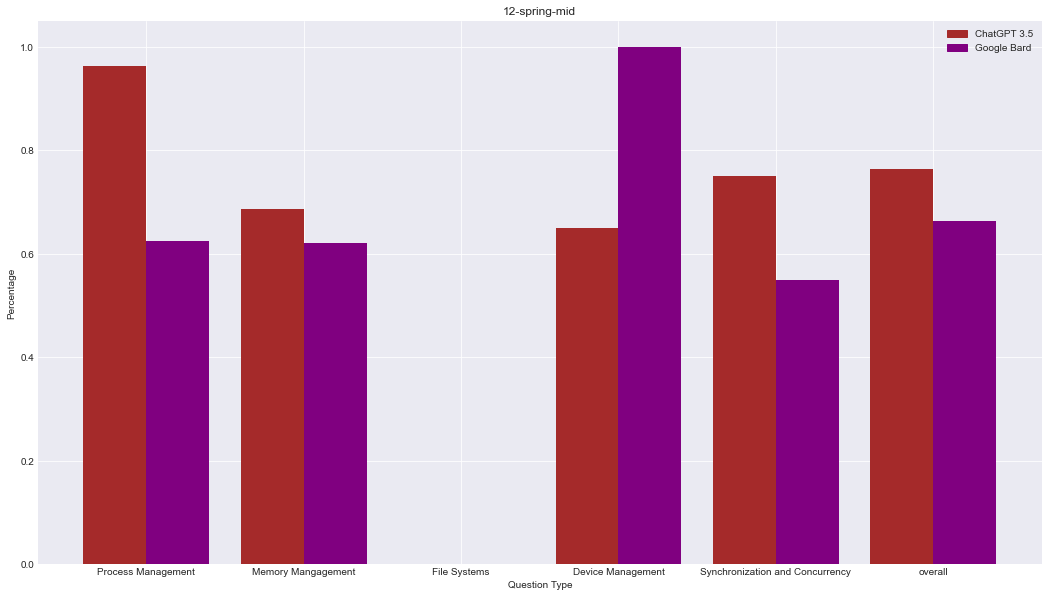

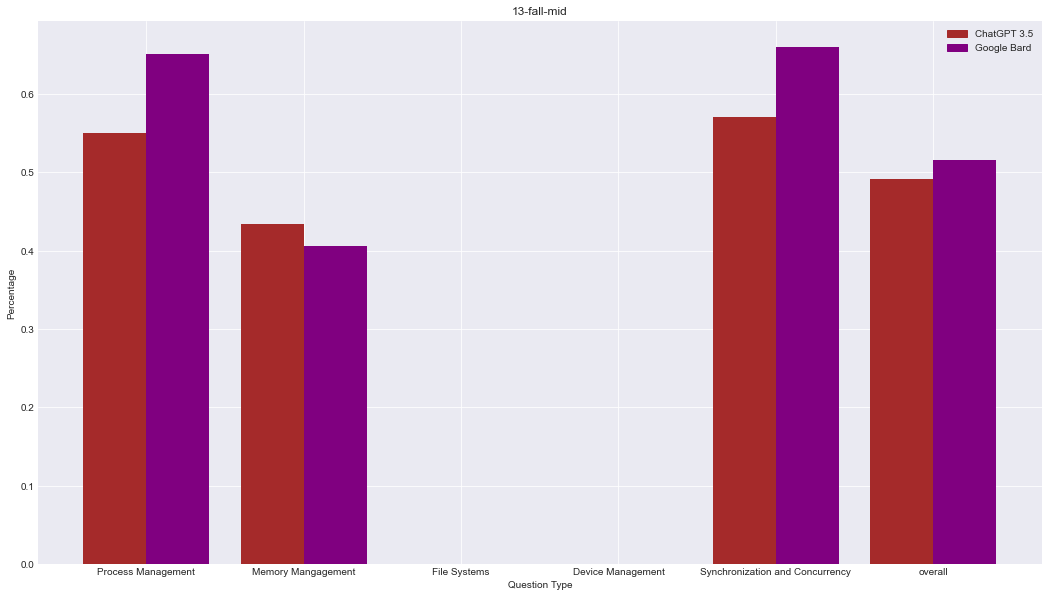

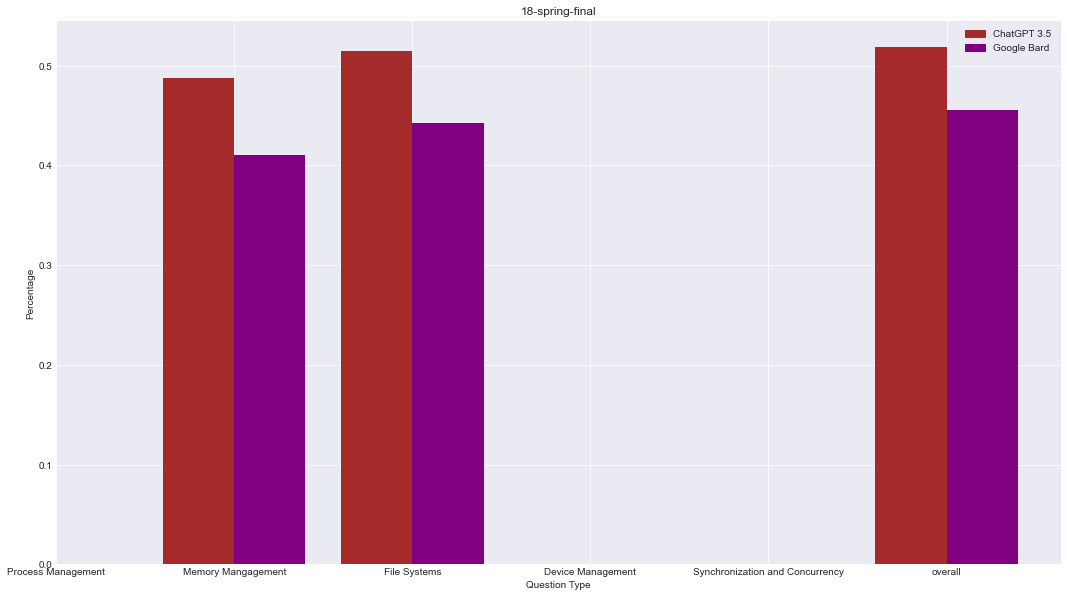

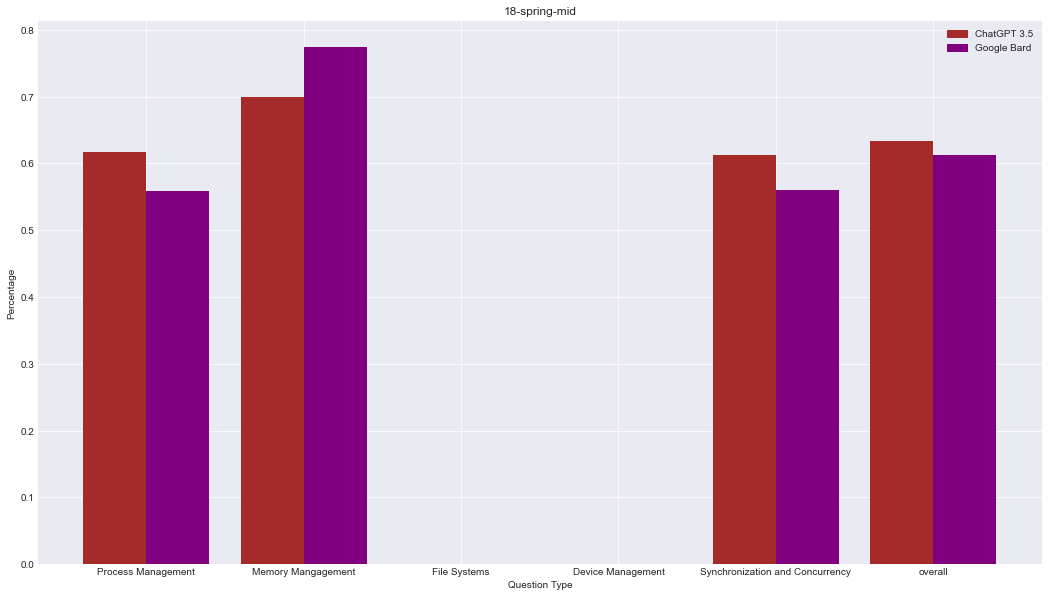

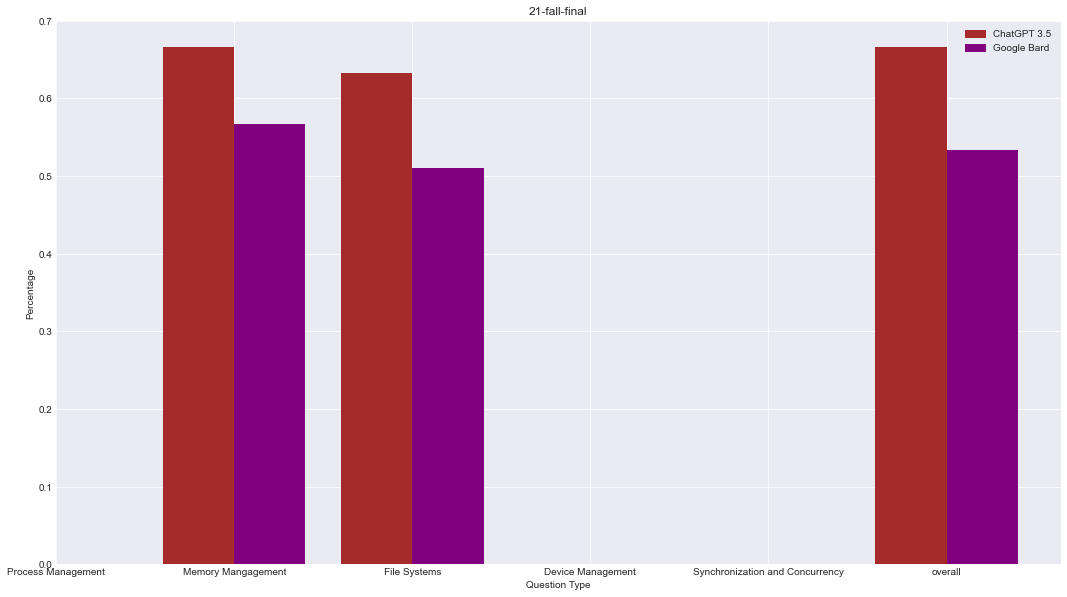

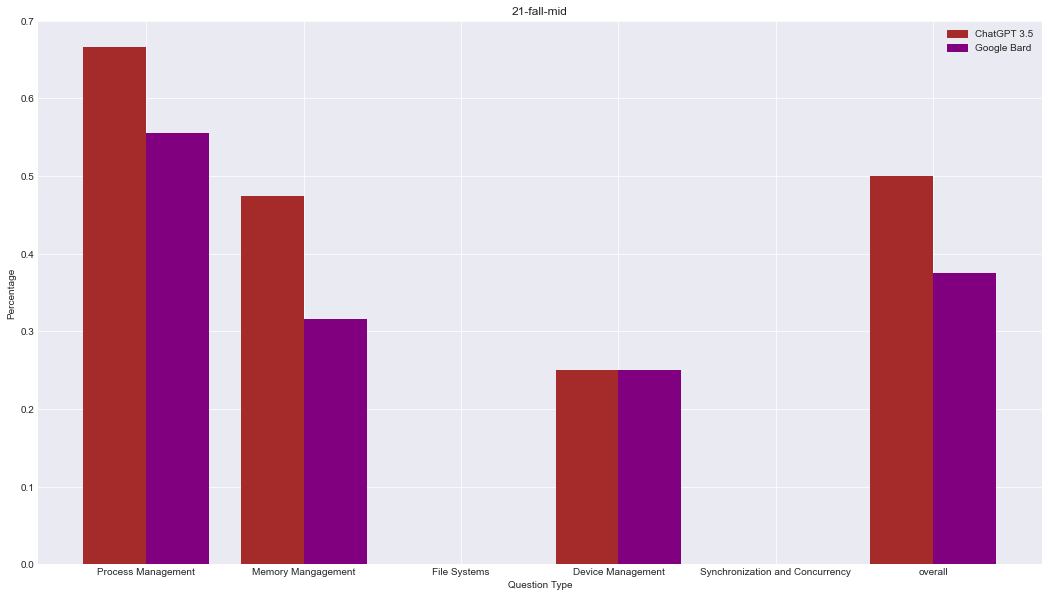

In [36]:
#graph
for i in range(13):
#     ax = axs[i]
#     matplotlib.style.use("tomato")
    fig, ax = plt.subplots(1,1)
    
    xax = np.arange(len(bard_df.loc[i]))#[~np.isnan(bard_df.loc[i])].tolist()))
    print(xax)
    gpt = gpt35_df.loc[i]
    b = bard_df.loc[i]
    ax.figure.set_size_inches(18, 10)
#     ax.figure(figsize=(18, 5))
#     ax.style.use('seaborn-darkgrid')
    ax.bar(xax - 0.2, gpt, 0.4, label = 'ChatGPT3.5', color = "brown")
    ax.bar(xax + 0.2, b, 0.4, label = 'Bard', color = "purple")
    
#     print(bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist())

    ax.set_xticks(xax, bard_df.loc[i].index.tolist())
    ax.set_xlabel("Question Type")
    ax.set_ylabel("Percentage")    
    ax.set_title(exams.iat[i,0])
    ax.legend(handles = [mpatches.Patch(color='brown', label='ChatGPT 3.5'),mpatches.Patch(color='purple', label='Google Bard')])
        
    fig.savefig(exams.iat[i,0]+'_ostopic.png')